In [93]:

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
state_inf = []
import pandas as pd
peakinf = []
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRdata.csv')
%matplotlib inline
plt.rcParams['figure.figsize'] = (50,40)
plt.style.use('ggplot')

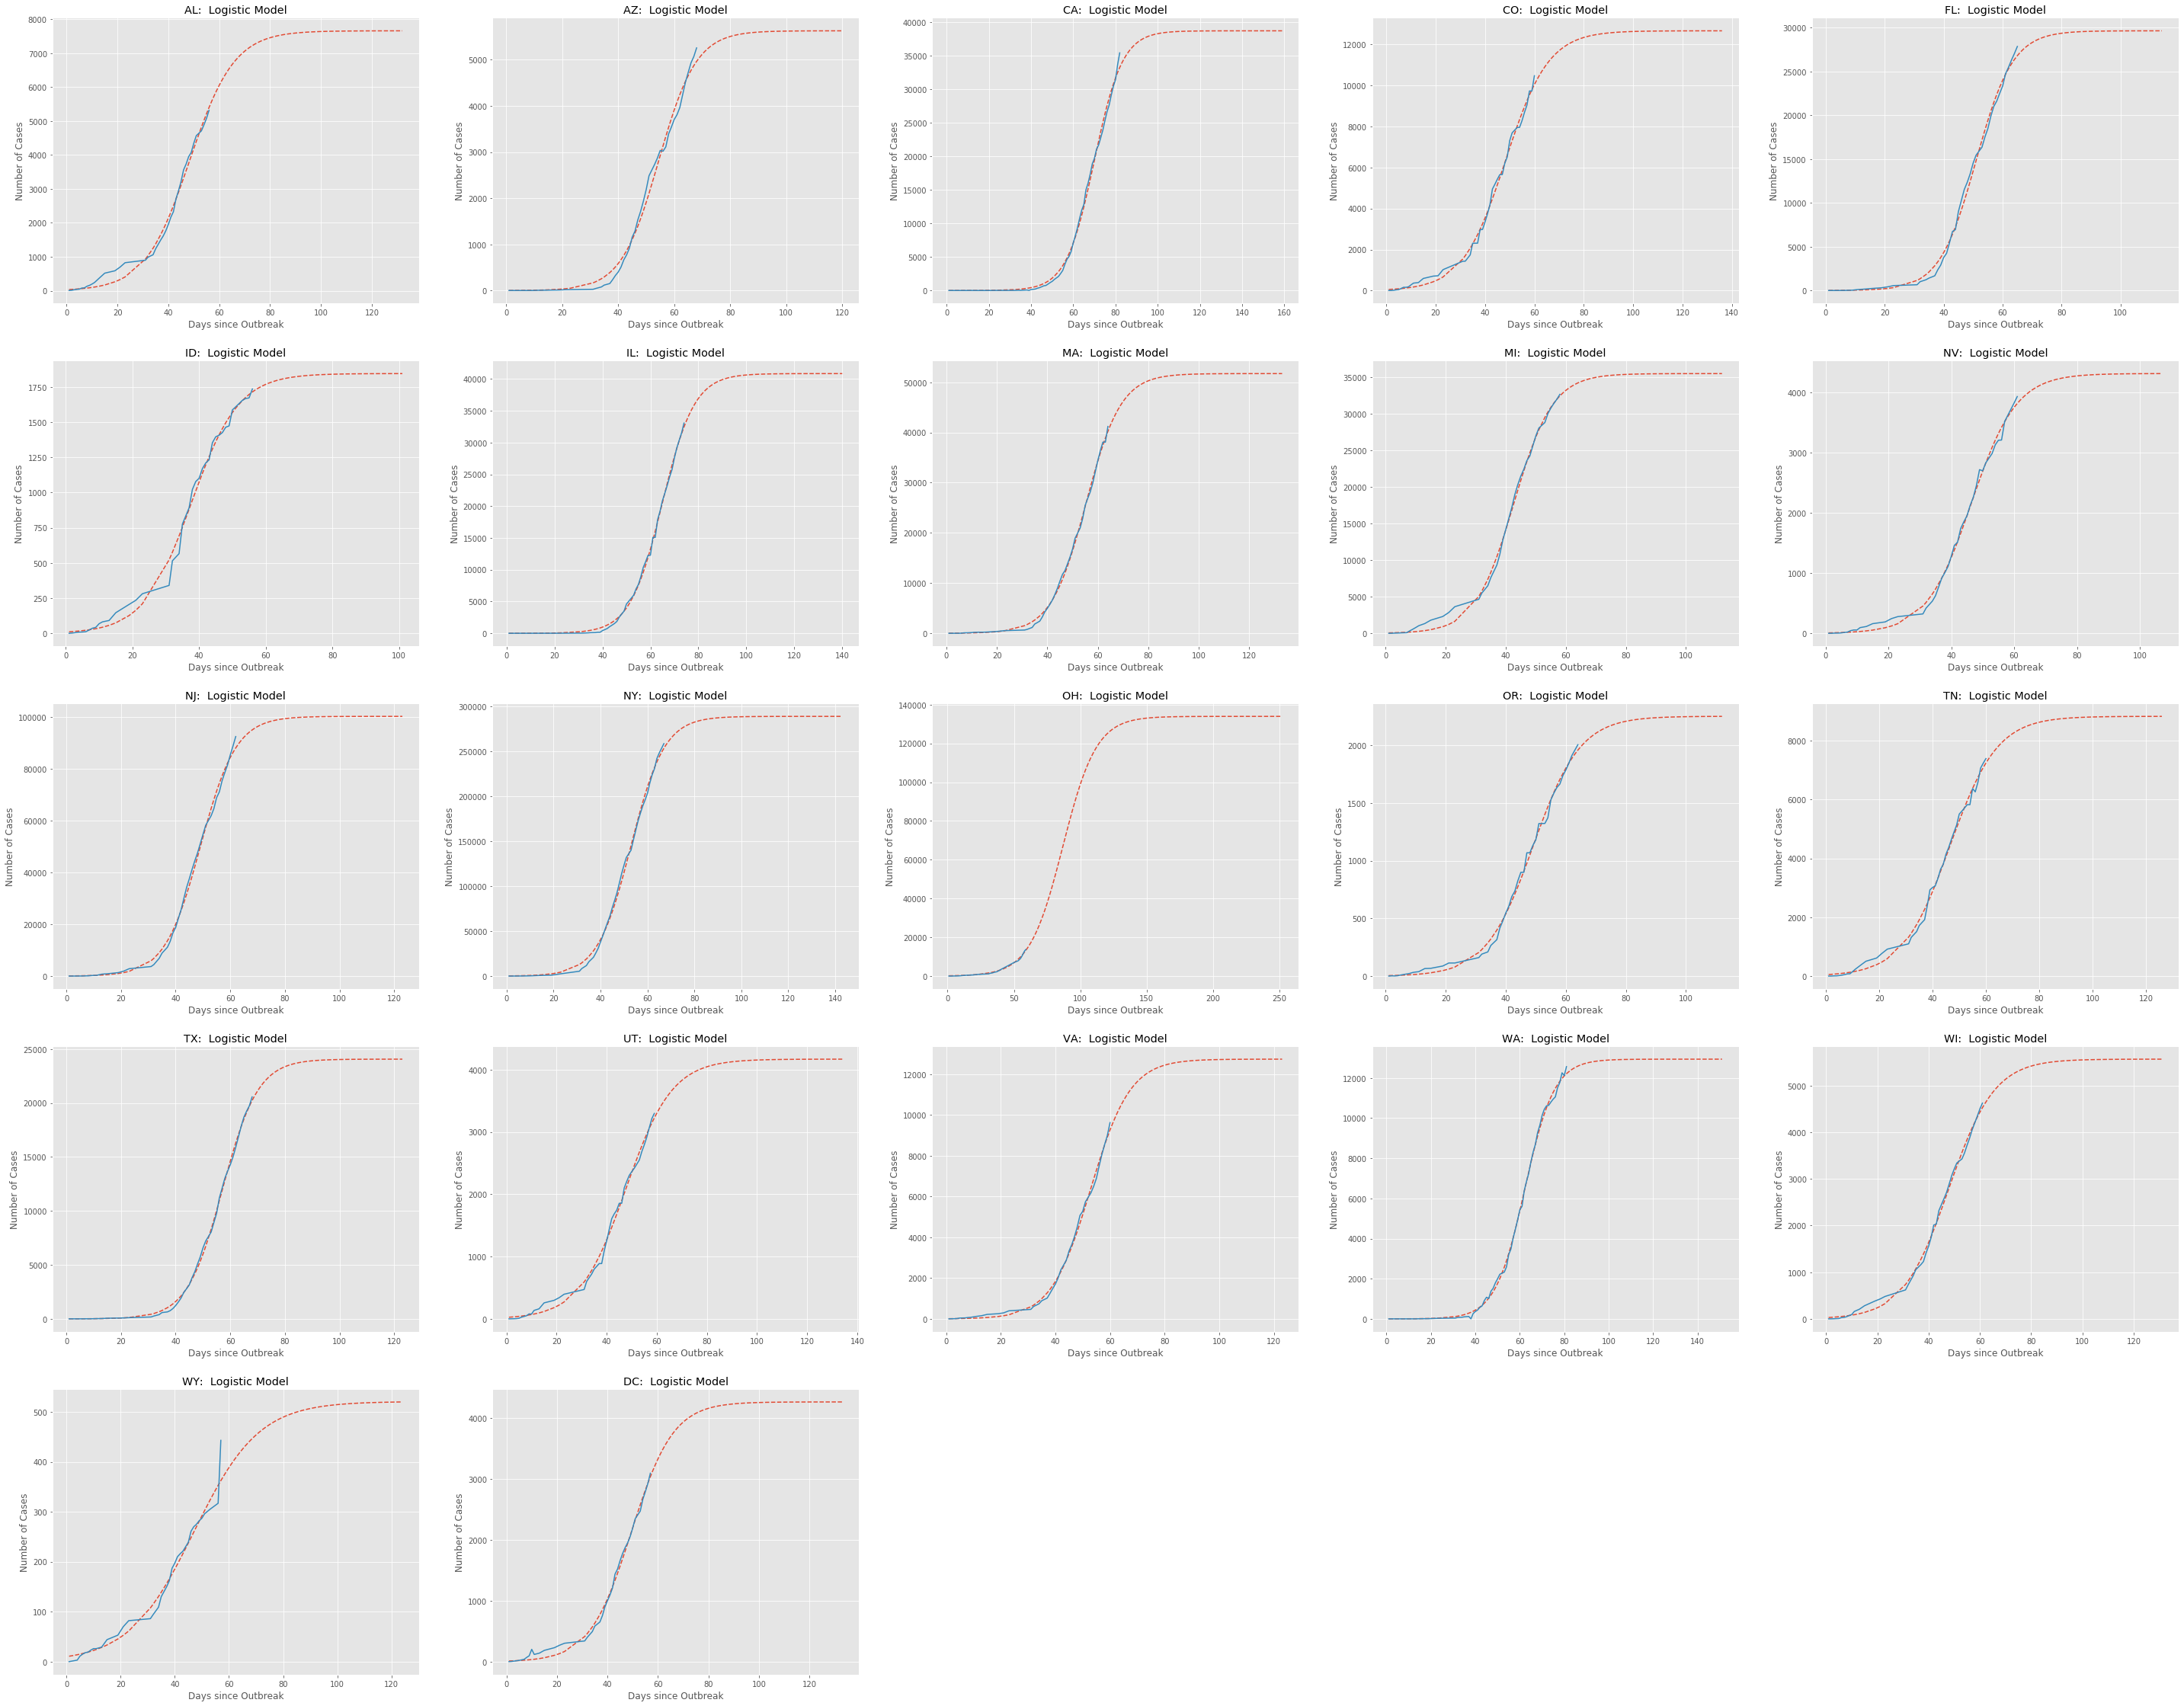

In [95]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

abb = ["AL", "AZ",  "CA", "CO", "FL",  "ID", "IL", "MA", "MI", "NV", "NJ", "NY", "OH",
       "OR", "TN", "TX", "UT", "VA", "WA", "WI", "WY", "DC"]

for x in abb:
        
    Dates = list(df1.index.values)
    state = df[df["Province/State"] == x]
    
    dAZ = state.groupby("Last Update")
    dAZ = dAZ.sum()
    dAZ= list(dAZ["Confirmed"].values)
    
    length = len(dAZ)
    dfDate = pd.DataFrame(Dates[0:length])
    
    WICases = pd.DataFrame({"Arizona": dAZ})
    WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
    WICases = WICases.rename(columns={0: "Date"})
    
    FMT = '%m/%d/%Y'
    days = WICases['Date']
    numday = []
    
    from datetime import datetime 
    for a in days:
        y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
        z = y.days
        numday.append(z)
    
    Day = numday
    Cases = list(WICases.iloc[:,1])
    

    
    import numpy as np
    def LogisticModel(x,v,t,c):
        return c/(1+np.exp(-(x-t)/v))
    
    fit = curve_fit(LogisticModel,Day,Cases,p0=[2,60,75000])
    params = fit[0]
    v = params[0]
    t = params[1]
    c = params[2]
    #print(states[state]+ v+ "Transmission speed")
    #print(states[state]+ t + "Point of Inflection")
    #print(states[state]+ c + "maximum predicted cases")
    ##infcases=Cases[int(t)-20]
    #state_inf.append(math.ceil(infcases))
    
    import math
    finishday = t
    finishday = math.ceil(finishday)
    startdate = "01/21/2020"
    startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
    
    enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
    #print("Day of Inflection: " + str(enddate))
    
    sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
    
    enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
    #print("End of the Infection: " + str(enddate))
    title=str(x)
    
    pred_x = list(range(max(Day),sol))
    
    Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
    
    
    a=plt.subplot(5,5, abb.index(x)+1)
    plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
    plt.plot(Day, Cases, label="COVID-19 Data")
    plt.title(title+':  Logistic Model')
    plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")




In [ ]:
import seaborn as sns
sns.set()
#sns.pairplot(data)#, hue="Language");

In [ ]:
correlation= data.corr()
plt.style.use('default')
Global_heatmap=plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.Reds)
plt.colorbar(Global_heatmap)
plt.xticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])
plt.yticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])           

In [ ]:


states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/21/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State","# Primary Care Physicians":"Primary Care Physicians"})
df1 = df1.set_index('Province/State')

df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')

df4 = df4[["Confirmed"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
#df = df.drop('Deaths', axis=1)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('%', 'Perc')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('.', '')
df.dtypes


In [ ]:


states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/21/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State","# Primary Care Physicians":"Primary Care Physicians"})
df1 = df1.set_index('Province/State')

df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')

df4 = df4[["Confirmed"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
#df = df.drop('Deaths', axis=1)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('%', 'Perc')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('.', '')
df.dtypes


states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/21/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State","# Primary Care Physicians":"Primary Care Physicians"})
df1 = df1.set_index('Province/State')

df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')

df4 = df4[["Confirmed"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
#df = df.drop('Deaths', axis=1)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('%', 'Perc')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('.', '')
df.dtypes


In [ ]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'Confirmed'], rotation = 90)
plt.yticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'Confirmed'], rotation = 0)

plt.title("HeatMap for State Data")
casescorr=corr_m['Confirmed']
casescorr.abs()

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="Confirmed~ PrimaryCarePhysicians + Deaths + Pop + PercSevereHousingProblems + IncomeRatio + PercLongCommuteDrivesAlone + PercWithAccesstoExerciseOpportunities + PercAdultswithObesity + FoodEnvironmentIndex + PercSmokers + YearsofPotentialLifeLostRate + PercUninsured + SocialAssociationRate + LandArea + TotalBeds + PercUnemployed + PercVaccinated + AverageNumberofMentallyUnhealthyDays + AverageNumberofPhysicallyUnhealthyDays + AverageDailyPM25 + PercSomeCollege + PercChildreninPoverty + PercSingleParentHouseholds + ChlamydiaRate + PreventableHospitalizationRate", data=df).fit()
peak_infections_linear_regression.summary()

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="Confirmed~  + Deaths + PrimaryCarePhysicians + PercSevereHousingProblems + FoodEnvironmentIndex + PercSmokers + AverageNumberofMentallyUnhealthyDays + TotalBeds + PercUninsured", data=df).fit()
peak_infections_linear_regression.summary()